In [1]:
import numpy as np
import matplotlib.pyplot as plt

Metric functions

In [18]:
def omega(r): 
    return 2.*J/r**3
def N(r):
    return (1.-2.*M/r)**(0.5)


### Neutron star parameters

$M$ ... gravitational mass

$R$ ... radius

$J$ ... angular momentum

$f$ ... rotational frequency

$\mu$ ... dipole moment 

In [150]:
f = 300. # Hz
M=1. # M_sol
Rad=3. #in km
Bp=1.e10
mu=Bp*Rad**3/2.
xi=np.pi/4.

### Magnetic field components

In [151]:
def Br(r,theta,phi,t):
    lmb=phi-2.*np.pi*f*t
    return (-3.*mu/(4.*M**3)*(2.*np.log(N(r)) + 2.*M/r*(1.+M/r))*(np.cos(xi)*np.cos(theta)+np.sin(xi)*np.sin(theta)*np.cos(lmb) ))
def Bth(r,theta,phi,t):
    lmb=phi-2.*np.pi*f*t
    return (3.*mu*N(r)/(4.*M**2*r)*(2.*r/M*np.log(N(r)) + 1./N(r)/N(r) + 1. )*(np.cos(xi)*np.sin(theta)-np.sin(xi)*np.cos(theta)*np.cos(lmb) ))
def Bphi(r,theta,phi,t):
    lmb=phi-2.*np.pi*f*t
    return (3.*mu*N(r)/(4.*M**2*r)*(2.*r/M*np.log(N(r)) + 1./N(r)/N(r) + 1. )*(np.sin(xi)*np.sin(lmb) ))


In [178]:
x_min=-15.
x_max=+15.

x=np.linspace(x_min,x_max,25)
y=x
z=x


In [189]:
#fig, ax = plt.subplots()
#ax.set_box_aspect(1)

px,pz = np.meshgrid(x,z)
t=0. + 0.5/f
phi=4.*np.pi/2.
theta=np.arctan(px/pz)
r=np.sqrt(px*px+pz*pz)

#take out the star and focus on the outher solution only
# r is in unit of mass
#X[(np.abs(X + 0.1) > 1).any(1)].shape 


Bx=np.sin(theta)*Br(r,theta,phi,t)+np.cos(theta)*Bth(r,theta,phi,t)
Bz=np.cos(theta)*Br(r,theta,phi,t)-np.sin(theta)*Bth(r,theta,phi,t)


#q = ax.quiver(px, pz, Bx, Bz)
#ax.quiverkey(q, X=0.3, Y=1.3, U=4, label='', labelpos='E')

#plt.show()



/var/folders/tw/r31sk7s53d700k4k7l12ddtc0000gn/T/ipykernel_39339/2892499791.py:7: RuntimeWarning: divide by zero encountered in divide
  theta=np.arctan(px/pz)
/var/folders/tw/r31sk7s53d700k4k7l12ddtc0000gn/T/ipykernel_39339/2892499791.py:7: RuntimeWarning: invalid value encountered in divide
  theta=np.arctan(px/pz)
/var/folders/tw/r31sk7s53d700k4k7l12ddtc0000gn/T/ipykernel_39339/3342851999.py:4: RuntimeWarning: divide by zero encountered in divide
  return (1.-2.*M/r)**(0.5)
/var/folders/tw/r31sk7s53d700k4k7l12ddtc0000gn/T/ipykernel_39339/3342851999.py:4: RuntimeWarning: invalid value encountered in sqrt
  return (1.-2.*M/r)**(0.5)
/var/folders/tw/r31sk7s53d700k4k7l12ddtc0000gn/T/ipykernel_39339/2412003684.py:3: RuntimeWarning: divide by zero encountered in divide
  return (-3.*mu/(4.*M**3)*(2.*np.log(N(r)) + 2.*M/r*(1.+M/r))*(np.cos(xi)*np.cos(theta)+np.sin(xi)*np.sin(theta)*np.cos(lmb) ))


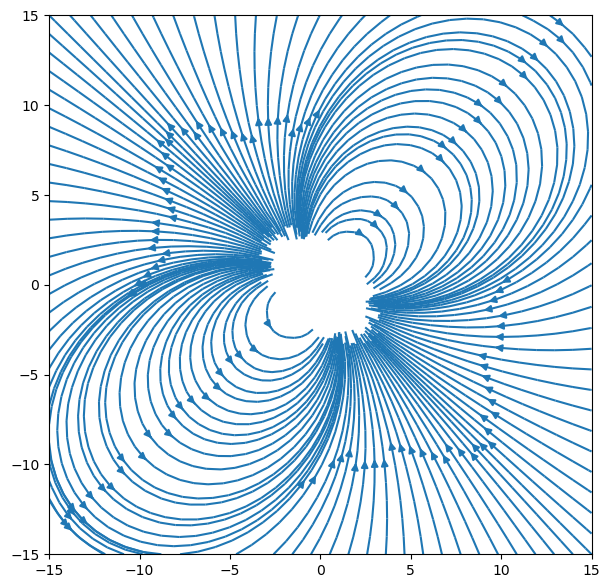

In [190]:
 
# Field Lines
fig = plt.figure(figsize = (7, 7))
strm=plt.streamplot(px, pz, Bx, Bz,broken_streamlines=False )#color=U, linewidth=2, cmap='autumn')
#fig.colorbar(strm.lines)
#strm = axs[1].streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
#fig.colorbar(strm.lines)
plt.show()